Cosine similarity shape: (182, 36)


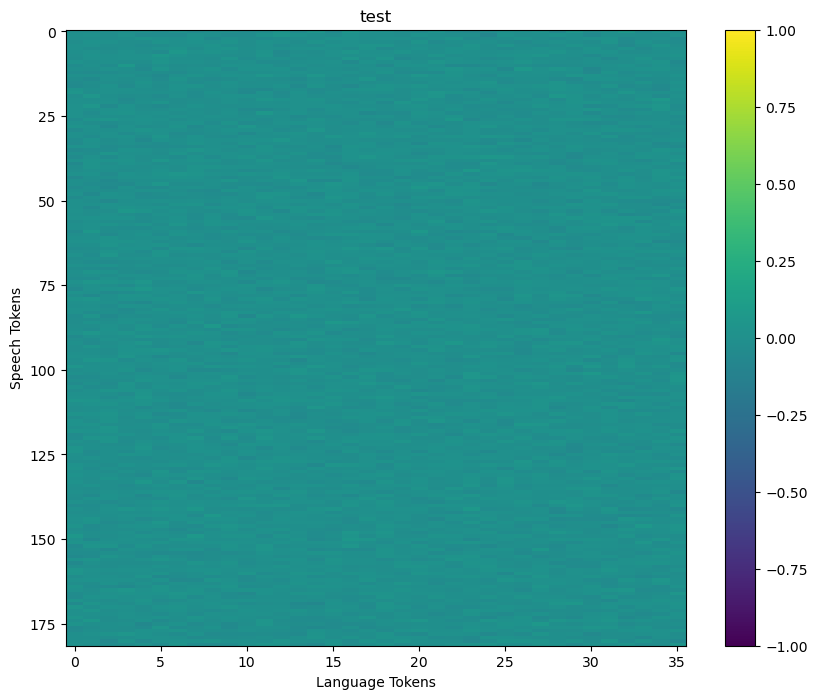

In [2]:
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

def plot_cosine_similarity_matrix(speech_emb, lang_emb, title='test'):    
    # Convert torch tensors to numpy if needed
    if torch.is_tensor(speech_emb):
        speech_emb = speech_emb.numpy()
    if torch.is_tensor(lang_emb):
        lang_emb = lang_emb.numpy()
    
    # Broadcast speech embeddings to match language embedding dimension
    speech_emb_broadcast = np.pad(speech_emb, ((0,0), (0, 1024)), 'constant')  # pad to 2048
    
    # Normalize the padded embeddings
    speech_emb_norm = normalize(speech_emb_broadcast)
    lang_emb_norm = normalize(lang_emb)
    
    # Calculate similarity matrix using matrix multiplication``
    similarity_matrix = np.dot(speech_emb_norm, lang_emb_norm.T)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xlabel('Language Tokens')
    plt.ylabel('Speech Tokens')
    plt.title(title)
    
    return similarity_matrix
# Example usage
speech_emb = torch.randn(182, 1024)  # Shape: (n_speech_tokens, embedding_dim)
lang_emb = torch.randn(36, 2048)     # Shape: (n_lang_tokens, embedding_dim)

similarity_matrix = plot_cosine_similarity_matrix(speech_emb, lang_emb)
print(f"Cosine similarity shape: {similarity_matrix.shape}")  # Expected shape: (182, 36)

In [2]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

def plot_cosine_similarity_matrix(speech_emb, lang_emb, title):    
    # Convert torch tensors to numpy if needed
    if torch.is_tensor(speech_emb):
        speech_emb = speech_emb.numpy()
    if torch.is_tensor(lang_emb):
        lang_emb = lang_emb.numpy()
    
    # Broadcast speech embeddings to match language embedding dimension
    speech_emb_broadcast = np.pad(speech_emb, ((0,0), (0, 1024)), 'constant')  # pad to 2048
    
    # Normalize the padded embeddings
    # speech_emb_norm = normalize(speech_emb_broadcast)
    # lang_emb_norm = normalize(lang_emb)
    
    # Calculate similarity matrix using matrix multiplication``
    similarity_matrix = np.dot(speech_emb_broadcast, lang_emb.T)
    # similarity_matrix = np.dot(speech_emb_norm, lang_emb_norm.T)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xlabel('Language Tokens')
    plt.ylabel('Speech Tokens')
    plt.title(title)
    
    return similarity_matrix


def process_embedding(file_path):
    if file_path.endswith('.pt'):
        # Load data
        data = torch.load(file_path)
        speech_emb = data['speech_embeddings'].numpy()
        lang_emb = data['language_embeddings'].numpy()
        
        # Handle multiple samples (batch)
        batch_size = speech_emb.shape[0]
        
        similarities = []
        # Loop over each sample and plot
        for i in range(batch_size):
            speech_sample = speech_emb[i]  # Shape: [n_speech_tokens, 1024]
            lang_sample = lang_emb[i]      # Shape: [n_lang_tokens, 2048]
            print(f"Speech Embedding Shape: {speech_sample.shape}")
            print(f"Language Embedding Shape: {lang_sample.shape}")
            
            # Plot similarity matrix
            similarity_matrix = plot_cosine_similarity_matrix(
                speech_sample, 
                lang_sample, 
                f"Pairwise Token Similarity - Sample {i+1} - {os.path.basename(file_path)}"
            )
            similarities.append(similarity_matrix)
            plt.show()
            
        return similarities
    else:
        print(f"{file_path} is not a valid .pt file.")
        return None

def process_all_embeddings_in_folder(folder_path):
    all_similarities = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.pt'):
            file_path = os.path.join(folder_path, filename)
            similarities = process_embedding(file_path)
            if similarities is not None:
                all_similarities[filename] = similarities
    return all_similarities

Speech Embedding Shape: (182, 1024)
Language Embedding Shape: (36, 2048)


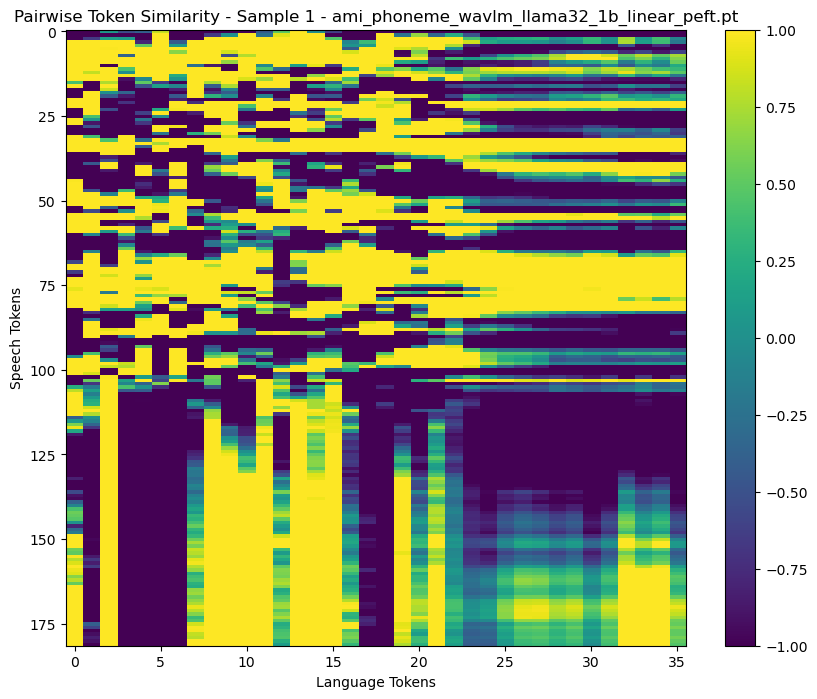

Speech Embedding Shape: (182, 1024)
Language Embedding Shape: (36, 2048)


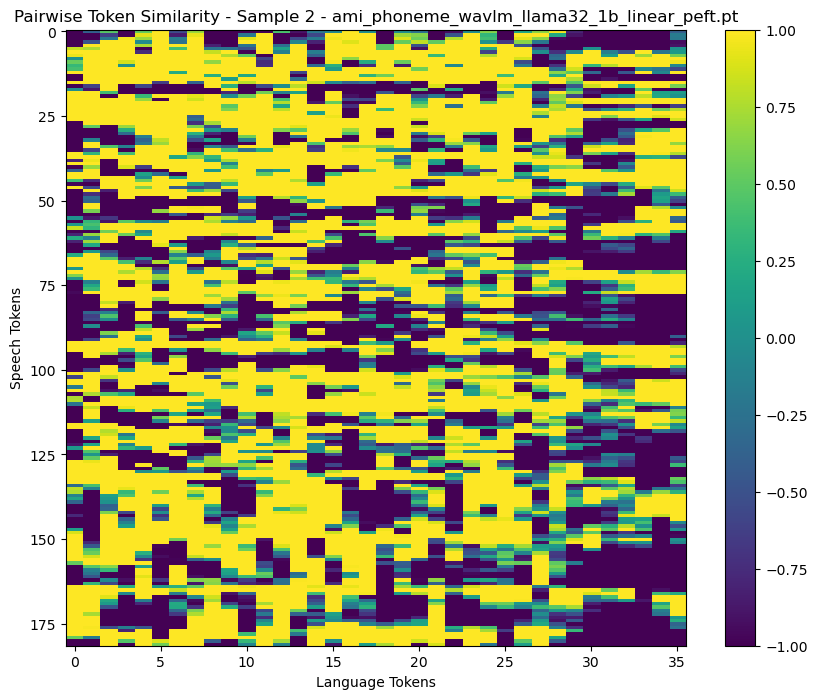

Speech Embedding Shape: (182, 1024)
Language Embedding Shape: (36, 2048)


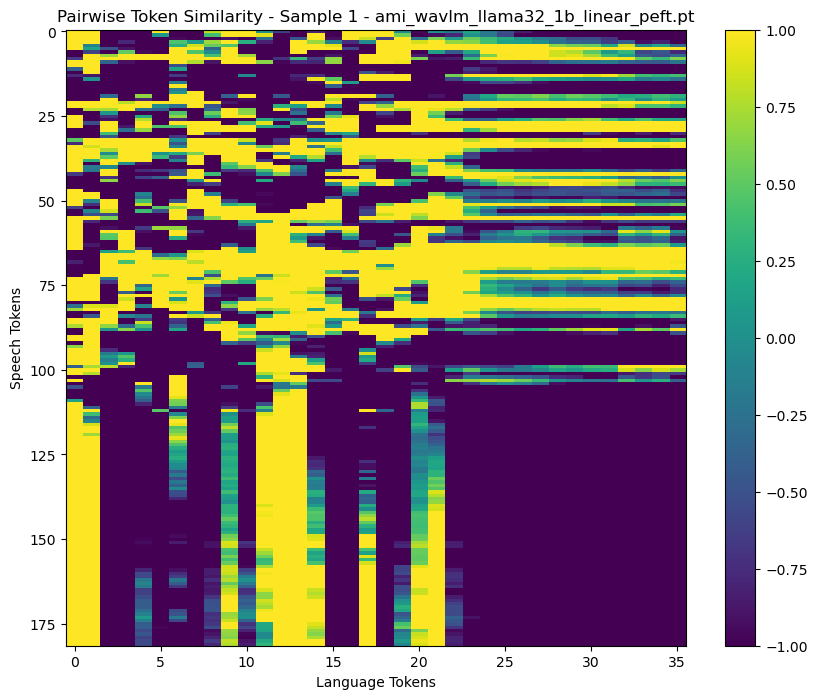

Speech Embedding Shape: (182, 1024)
Language Embedding Shape: (36, 2048)


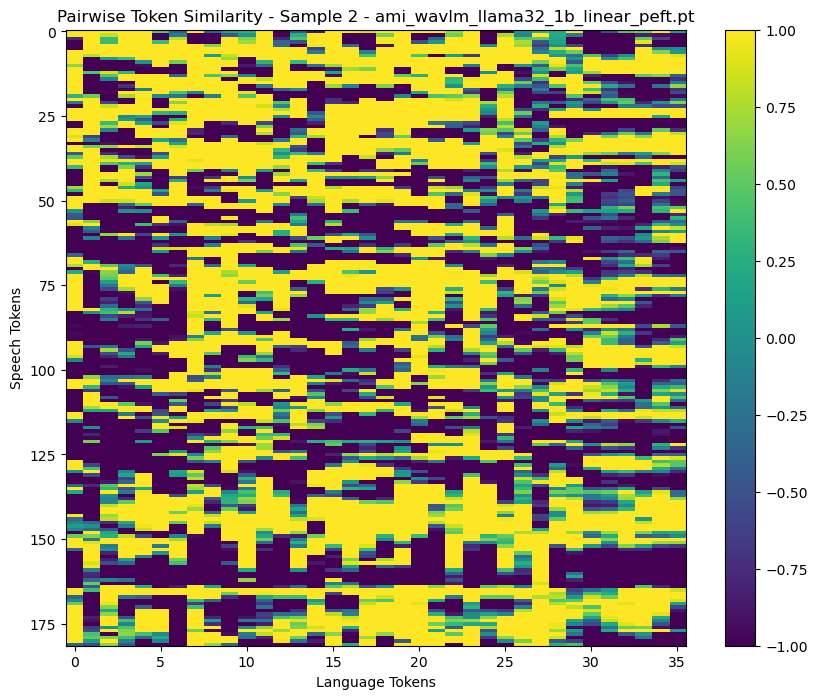

Speech Embedding Shape: (711, 1024)
Language Embedding Shape: (142, 2048)


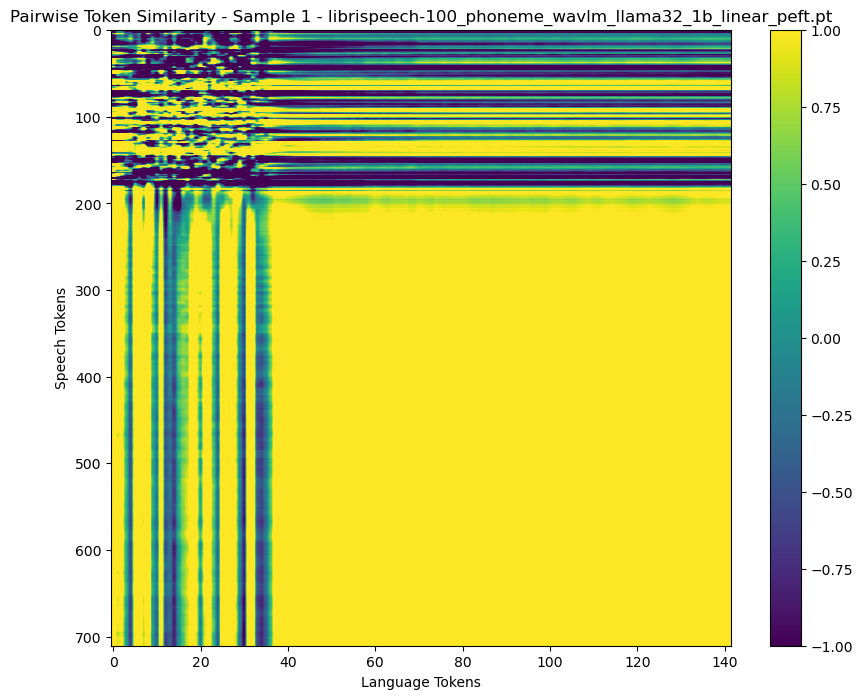

Speech Embedding Shape: (711, 1024)
Language Embedding Shape: (142, 2048)


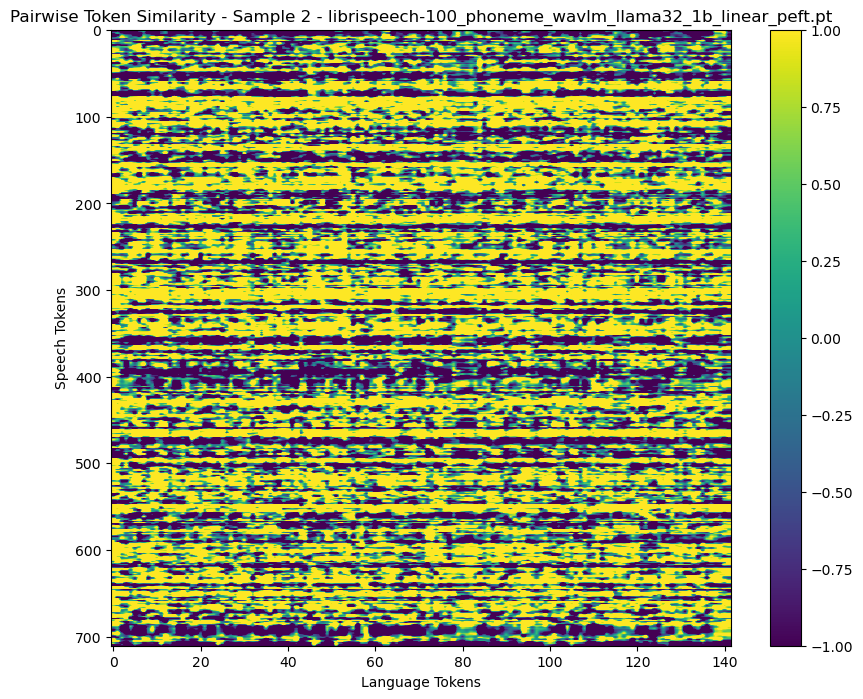

Speech Embedding Shape: (814, 1024)
Language Embedding Shape: (162, 2048)


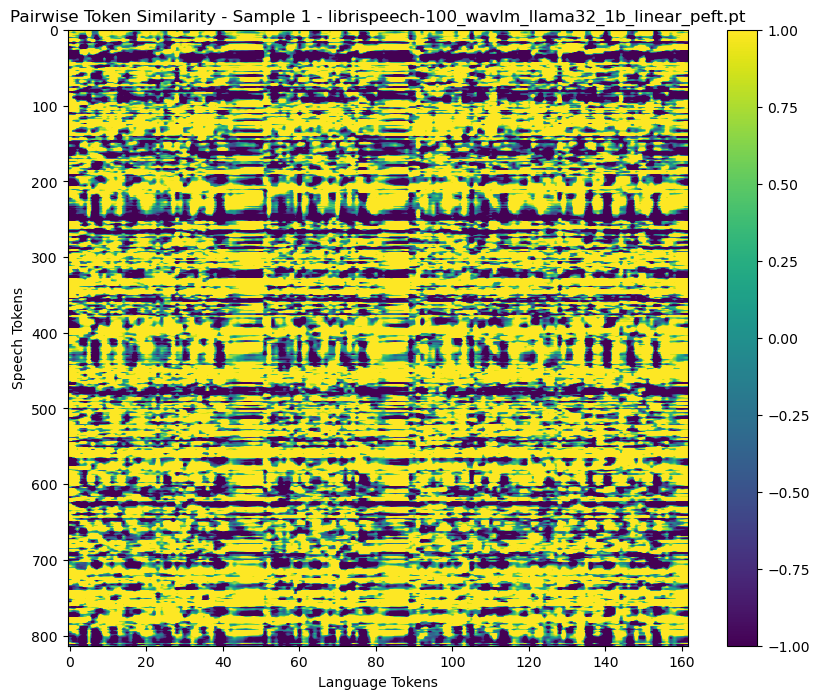

Speech Embedding Shape: (814, 1024)
Language Embedding Shape: (162, 2048)


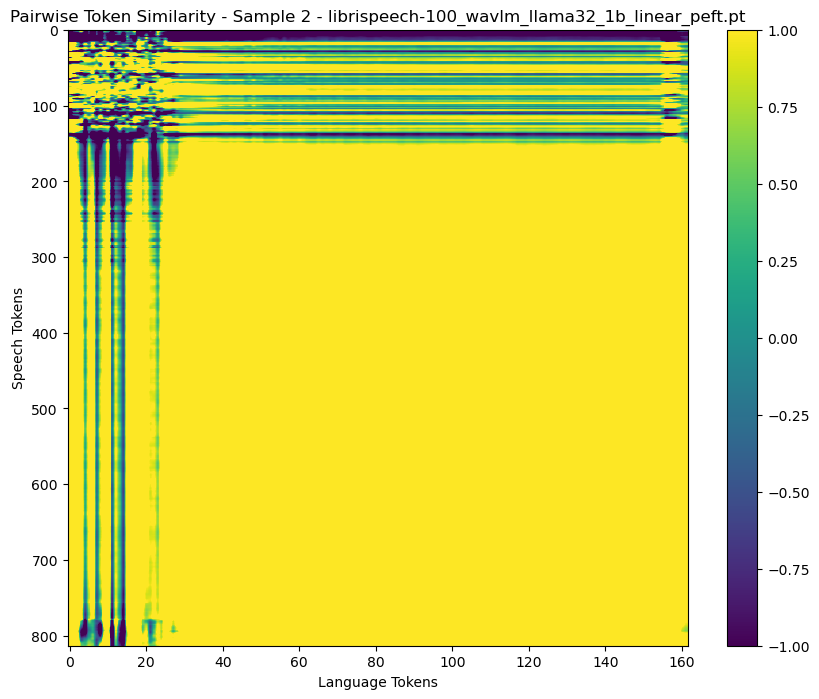

Speech Embedding Shape: (410, 1024)
Language Embedding Shape: (82, 2048)


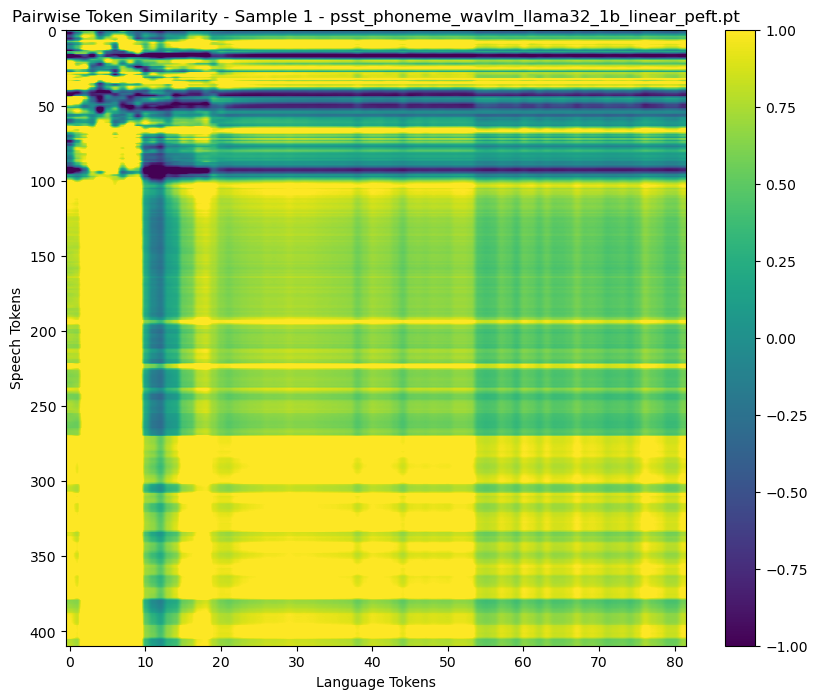

Speech Embedding Shape: (410, 1024)
Language Embedding Shape: (82, 2048)


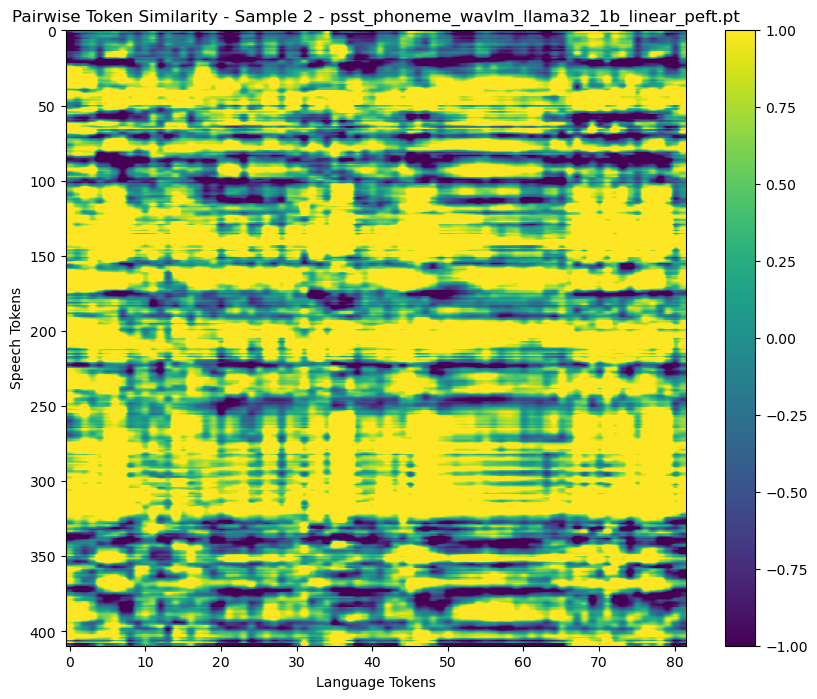

{'ami_phoneme_wavlm_llama32_1b_linear_peft.pt': [array([[-3.6767108 , -2.7850697 ,  0.06338894, ..., -2.4384284 ,
          -2.384513  , -2.3387766 ],
         [-4.4087853 , -2.4778967 , -2.7436762 , ..., -1.5704223 ,
          -1.5823215 , -1.5513915 ],
         [-1.3949876 , -0.65246964,  0.13852626, ...,  0.08083752,
           0.3965043 , -0.10494143],
         ...,
         [ 2.2673044 , -0.83287096,  2.5509484 , ...,  1.3023208 ,
           1.47771   ,  0.5812232 ],
         [ 2.0816987 , -0.90253735,  2.528807  , ...,  1.238212  ,
           1.4082105 ,  0.50943977],
         [ 1.6042496 , -1.327044  ,  2.4095144 , ...,  1.2085963 ,
           1.3685575 ,  0.45926133]], dtype=float32),
  array([[-2.2316191 , -0.3897614 ,  0.4784618 , ..., -2.2986205 ,
          -1.4289532 , -0.4102974 ],
         [-3.1520617 , -1.0520759 , -0.6173552 , ..., -1.7272527 ,
          -1.5302935 , -0.16706303],
         [-3.519192  , -1.2512934 , -0.19352645, ..., -2.178054  ,
          -1.6620913 , 

In [3]:
# Example folder path
folder_path = '/work/van-speech-nlp/jindaznb/jslpnb/mllm_experiments/slam-llm/examples/asr_librispeech/plot/embeddings'
process_all_embeddings_in_folder(folder_path)


# librispeec-ASR

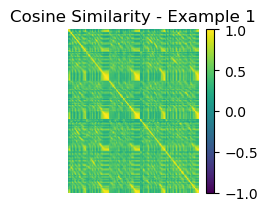

In [18]:
file_path = '/work/van-speech-nlp/jindaznb/jslpnb/mllm_experiments/slam-llm/examples/asr_librispeech/plot/embeddings/librispeech-100_wavlm_llama32_1b_linear_peft.pt'
process_single_embedding(file_path)

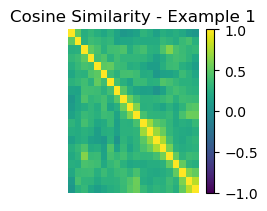

In [20]:
file_path = '/work/van-speech-nlp/jindaznb/jslpnb/mllm_experiments/slam-llm/examples/asr_librispeech/plot/embeddings/ami_phoneme_wavlm_llama32_1b_linear_peft.pt'
process_single_embedding(file_path)